In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


dimensions de x: (100, 2)
dimensions de y: (100, 1)


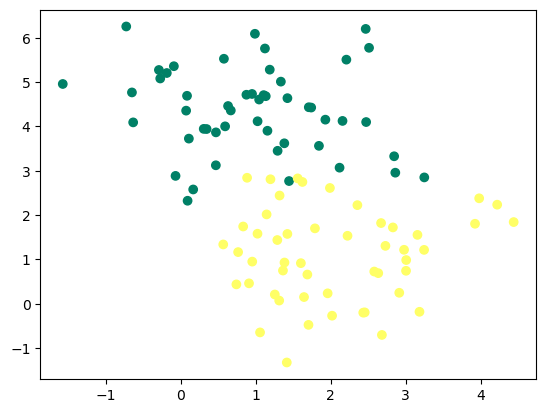

Model epoch 0, loss val: -0.4769012445466085
Model epoch 1, loss val: -0.2449495434439359
Model epoch 2, loss val: -0.10911022937268859
Model epoch 3, loss val: -0.031114218457190947
Model epoch 4, loss val: 0.01539486664235132
Model epoch 5, loss val: 0.04426705109706479
Model epoch 6, loss val: 0.06268435537005677
Model epoch 7, loss val: 0.0745859176642029
Model epoch 8, loss val: 0.08226919675369297
Model epoch 9, loss val: 0.0871453226099334
Model epoch 10, loss val: 0.09011698746122822
Model epoch 11, loss val: 0.09177998675194463
Model epoch 12, loss val: 0.09253708867251051
Model epoch 13, loss val: 0.09266560115046389
Model epoch 14, loss val: 0.09235912784269842
Model epoch 15, loss val: 0.09175424937327557
Model epoch 16, loss val: 0.09094804472880233
Model epoch 17, loss val: 0.0900098582685158
Model epoch 18, loss val: 0.088989349304976
Model epoch 19, loss val: 0.08792208331112766
Model epoch 20, loss val: 0.08683346515428601
Model epoch 21, loss val: 0.08574153552805332


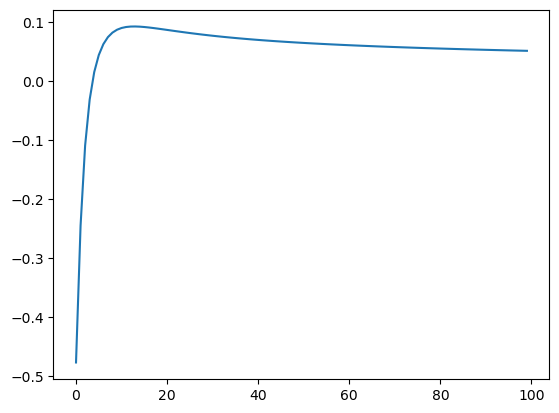

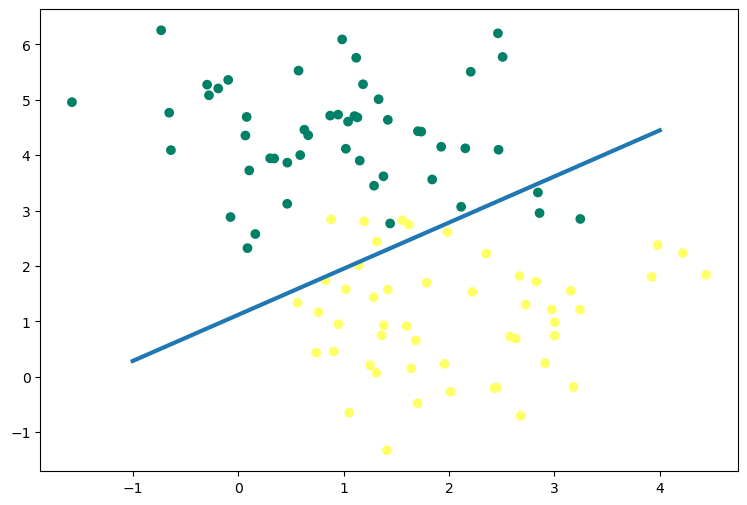

In [3]:
def init_data():
    x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
    y = y.reshape((y.shape[0], 1))
    print(f"dimensions de x: {x.shape}")
    print(f"dimensions de y: {y.shape}")
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='summer')
    plt.show()
    return x, y

def init_params(x):
    w = np.random.randn(x.shape[1], 1)
    b = np.random.rand(1)
    return w, b

def model(x, w, b):
    z = x.dot(w) + b
    a = 1/(1+np.exp(-z))
    return a

def log_loss(a,y):
    return 1/len(y) * np.sum(-y * np.log(a) + (1 - y) * np.log(1 - a))

def gradient(a, x, y):
    dw = 1/len(y) * np.dot(x.T, a-y)
    db = 1/len(y) * np.sum(a-y)
    return dw, db

def update(dw, db, w, b, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def predict(x,w,b):
    a = model(x,w,b)
    return a >= 0.5

def artificial_neuron(x, y, learning_rate=0.1, epoch=100):
    #initialisation
    w, b = init_params(x)

    loss_history = []
    for i in range(epoch):
        a = model(x, w, b)
        loss_val =  log_loss(a,y)
        loss_history.append(loss_val)
        dw, db = gradient(a, x, y)
        w, b = update(dw, db, w, b, learning_rate)
        print(f"Model epoch {i}, loss val: {loss_val}")

    y_pred = predict(x,w,b)
    model_score = accuracy_score(y,y_pred)
    print(f"Loss history: {loss_history}")
    print(f"Accuracy : {model_score}")

    plt.plot(loss_history)
    plt.show()

    plot_frontière_decision(x, y, w, b)


def plot_frontière_decision(x, y, w, b):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.scatter(x[:,0], x[:,1], c=y, cmap='summer')

    x1 = np.linspace(-1, 4, 100)
    x2 = (-w[0]*x1-b)/w[1]

    ax.plot(x1, x2, lw=3)

def main():
    x, y = init_data()
    artificial_neuron(x, y, learning_rate=0.1, epoch=100)
    
main()    